## Reading File 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataFrame = pd.read_csv('./Arquivos/HIST_PAINEL_COVIDBR_15mai2021.csv', sep=';')

<h3 style='color:#ff335f'> Before removing noisy data </h3>

In [3]:
dataFrame.isnull().sum()

regiao                          0
estado                        448
municipio                   21205
coduf                           0
codmun                      12490
codRegiaoSaude              21205
nomeRegiaoSaude             21205
data                            0
semanaEpi                       0
populacaoTCU2019             8715
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          2332362
emAcompanhamentoNovos     2332362
interior/metropolitana      21205
dtype: int64

## Noisy Data

<span style="color:#3385ff"> **Removing noisy 'regiao' and set index**</span>

In [4]:
# Copy brasil data
dataFrameBrasil = dataFrame[dataFrame['regiao'] == 'Brasil']

# Remove 'Brasil' region
indexNames = dataFrame[dataFrame['regiao'] == 'Brasil'].index
dataFrame.drop(indexNames, inplace=True)

dataFrame.set_index('regiao', inplace=True)

<span style='color:#3385ff'> **Removing noisy 'municipio'** </span>

In [5]:
dataFrame['municipio'].isnull().sum()

20757

In [6]:
dataFrame.dropna(subset=['municipio'], inplace=True)

In [7]:
dataFrame['municipio'].isnull().sum()

0

 <span style='color:#3385ff'> **Removing noisy 'Recuperadosnovos' and 'emAcompanhamentoNovos'** </span>

In [8]:
dataFrame['Recuperadosnovos'].notna().sum()

0

In [9]:
dataFrame['emAcompanhamentoNovos'].notna().sum()

0

In [10]:
del dataFrame['Recuperadosnovos']
del dataFrame['emAcompanhamentoNovos']

 <span style='color:#3385ff'> **Remove column useless** </span>

In [11]:
del dataFrame['coduf']
del dataFrame['codRegiaoSaude']
del dataFrame['codmun']
del dataFrame['semanaEpi']
del dataFrame['interior/metropolitana']
del dataFrame['nomeRegiaoSaude']

 <h3 style='color:#ff335f'> After removing noisy data </h3>

In [12]:
dataFrame.isnull().sum()

estado              0
municipio           0
data                0
populacaoTCU2019    0
casosAcumulado      0
casosNovos          0
obitosAcumulado     0
obitosNovos         0
dtype: int64

In [118]:
dataFrame

,regiao,estado,municipio,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,clusters
0,Norte,RO,Alta Floresta D'Oeste,2020-03-27,22945.0,0,0,0,0,0
1,Norte,RO,Alta Floresta D'Oeste,2020-03-28,22945.0,0,0,0,0,0
2,Norte,RO,Alta Floresta D'Oeste,2020-03-29,22945.0,0,0,0,0,0
3,Norte,RO,Alta Floresta D'Oeste,2020-03-30,22945.0,0,0,0,0,0
4,Norte,RO,Alta Floresta D'Oeste,2020-03-31,22945.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2311545,Centro-Oeste,DF,Brasília,2021-05-11,3015268.0,388286,766,8184,34,2
2311546,Centro-Oeste,DF,Brasília,2021-05-12,3015268.0,389178,892,8217,33,2
2311547,Centro-Oeste,DF,Brasília,2021-05-13,3015268.0,390117,939,8251,34,2
2311548,Centro-Oeste,DF,Brasília,2021-05-14,3015268.0,390805,688,8275,24,2


## Data Visualization 

In [14]:
estados = dataFrame.groupby('estado')
estados.size()

estado
AC      9130
AL     42330
AM     25730
AP      6640
BA    173055
CE     76360
DF       415
ES     32370
GO    102090
MA     90055
MG    353995
MS     32785
MT     58515
PA     59760
PB     92545
PE     76775
PI     92960
PR    165585
RJ     38180
RN     69305
RO     21580
RR      6225
RS    206255
SC    122425
SE     31125
SP    267675
TO     57685
dtype: int64

In [15]:
# Filtrando por mês ("2020-03-01" - "2021-05-01")
def filtro_mes():
    filtro_data = [
        "2020-03-01",
        "2020-04-01",
        "2020-05-01",
        "2020-06-01",
        "2020-07-01",
        "2020-08-01",
        "2020-09-01",
        "2020-10-01",
        "2020-11-01",
        "2020-12-01",
        "2020-01-01",
        "2021-02-01",
        "2021-03-01",
        "2021-04-01",
        "2021-05-15",
    ]
    temp = pd.DataFrame({})

    for data in filtro_data:
        temp = temp.append(dataFrame[dataFrame['data'] == data])
    
    return temp

<AxesSubplot:xlabel='estado'>

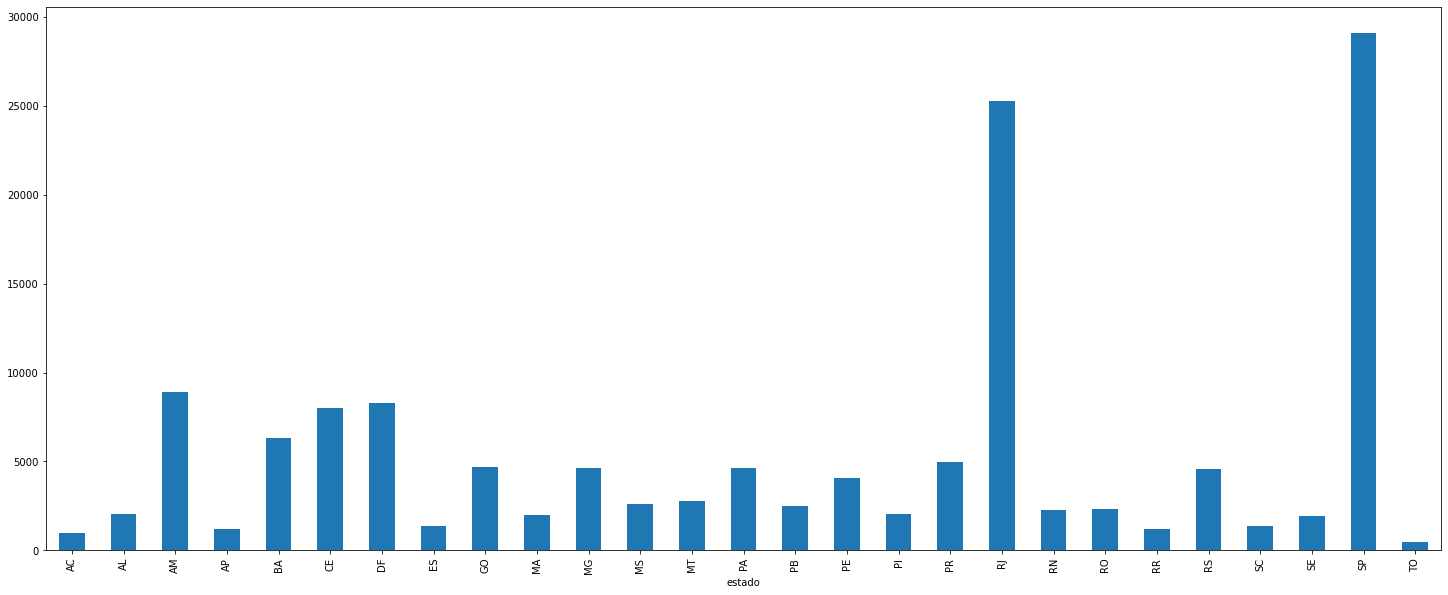

In [16]:
a = estados['obitosAcumulado'].max()
a.plot.bar(figsize=(25,10))

<AxesSubplot:xlabel='estado'>

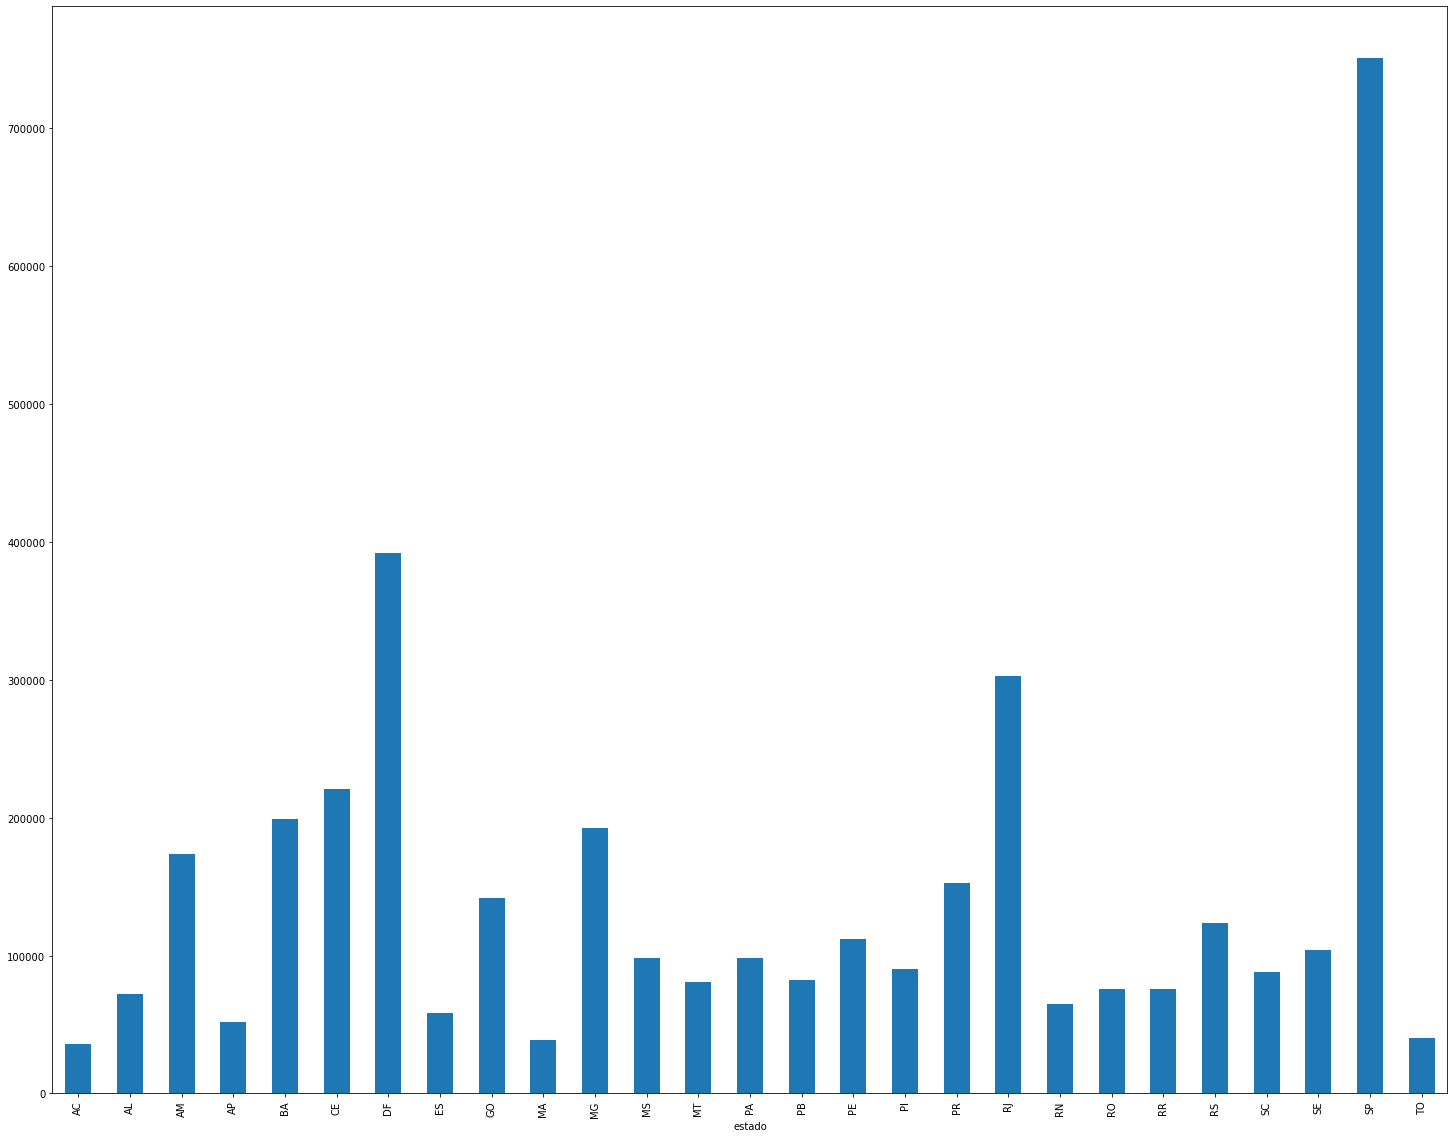

In [17]:
a = estados['casosAcumulado'].max()
a.plot.bar(figsize=(25,20))

## Alagoas 

In [18]:
alagoas = dataFrame[dataFrame['estado'] == 'AL']

### Número de obitos acumulados em Alagoas

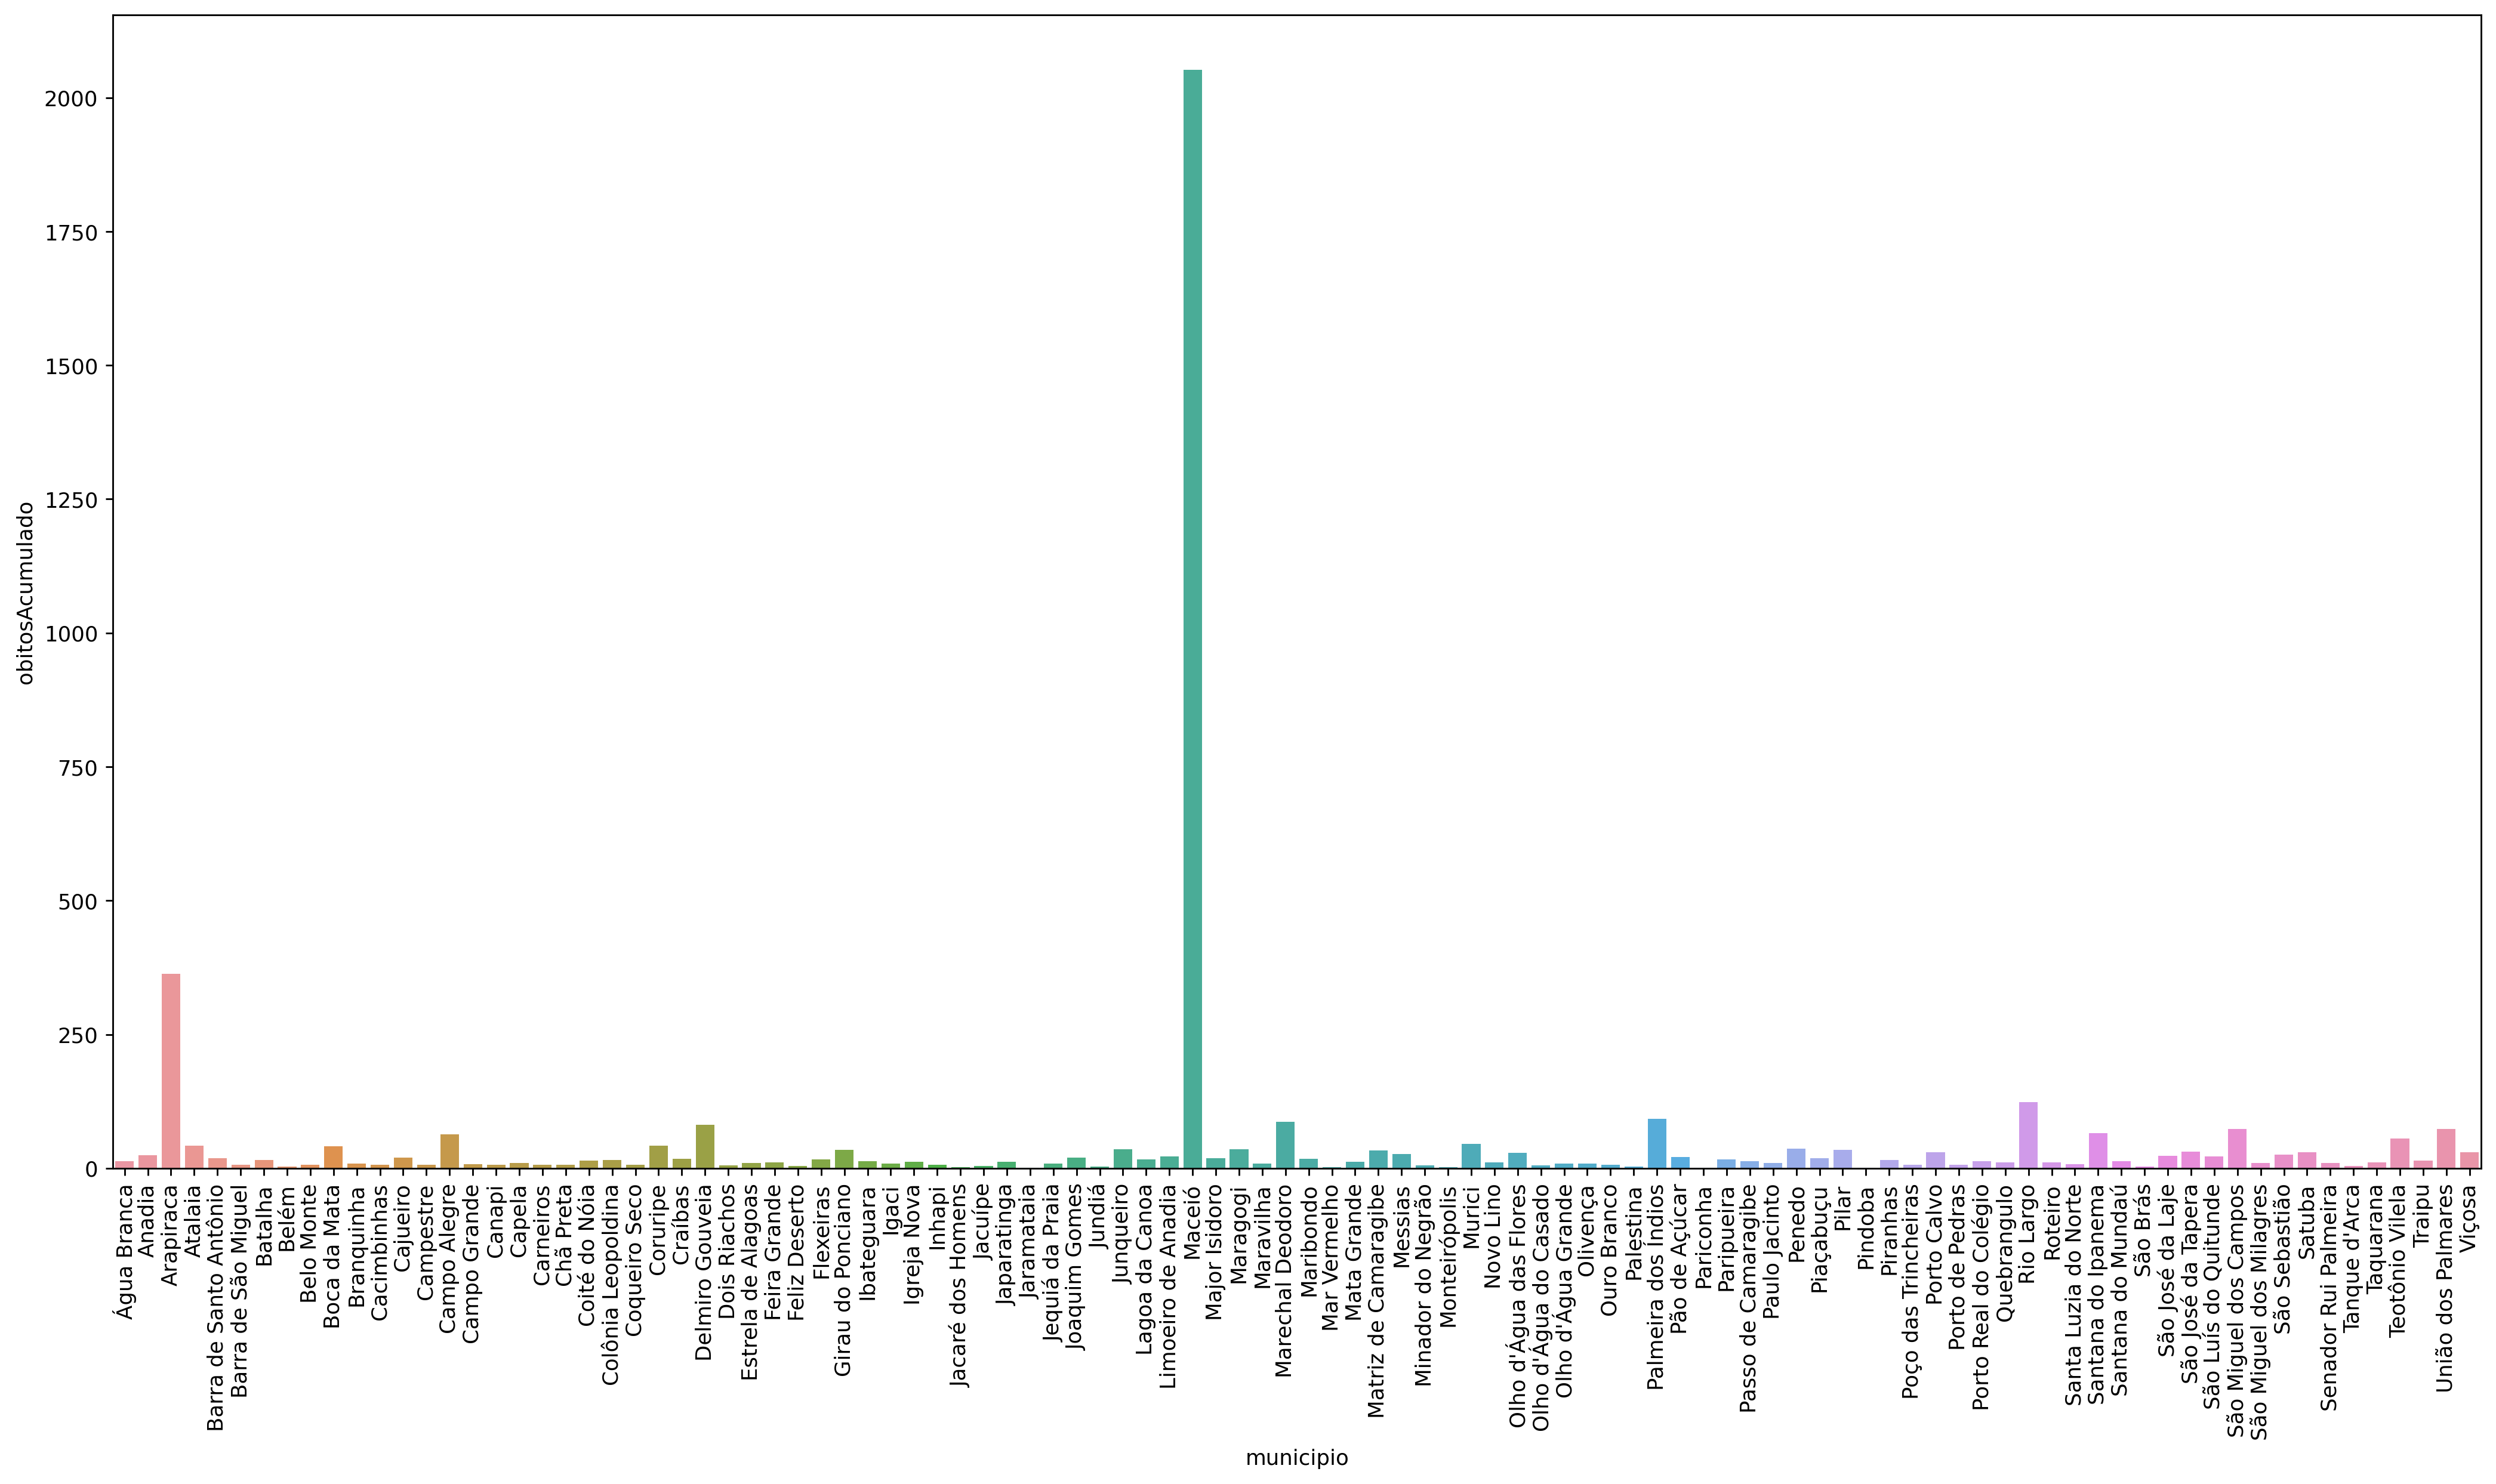

In [19]:
temp = alagoas[alagoas['data'] == "2021-05-15"]

plt.figure(figsize=(20,10), dpi=256)
sns.barplot(x='municipio',y='obitosAcumulado',data=temp)
plt.xticks(rotation=90)
plt.show()
# temp[temp['municipio'] == "Maceió"]

### Casos Acumulados em alagoas 

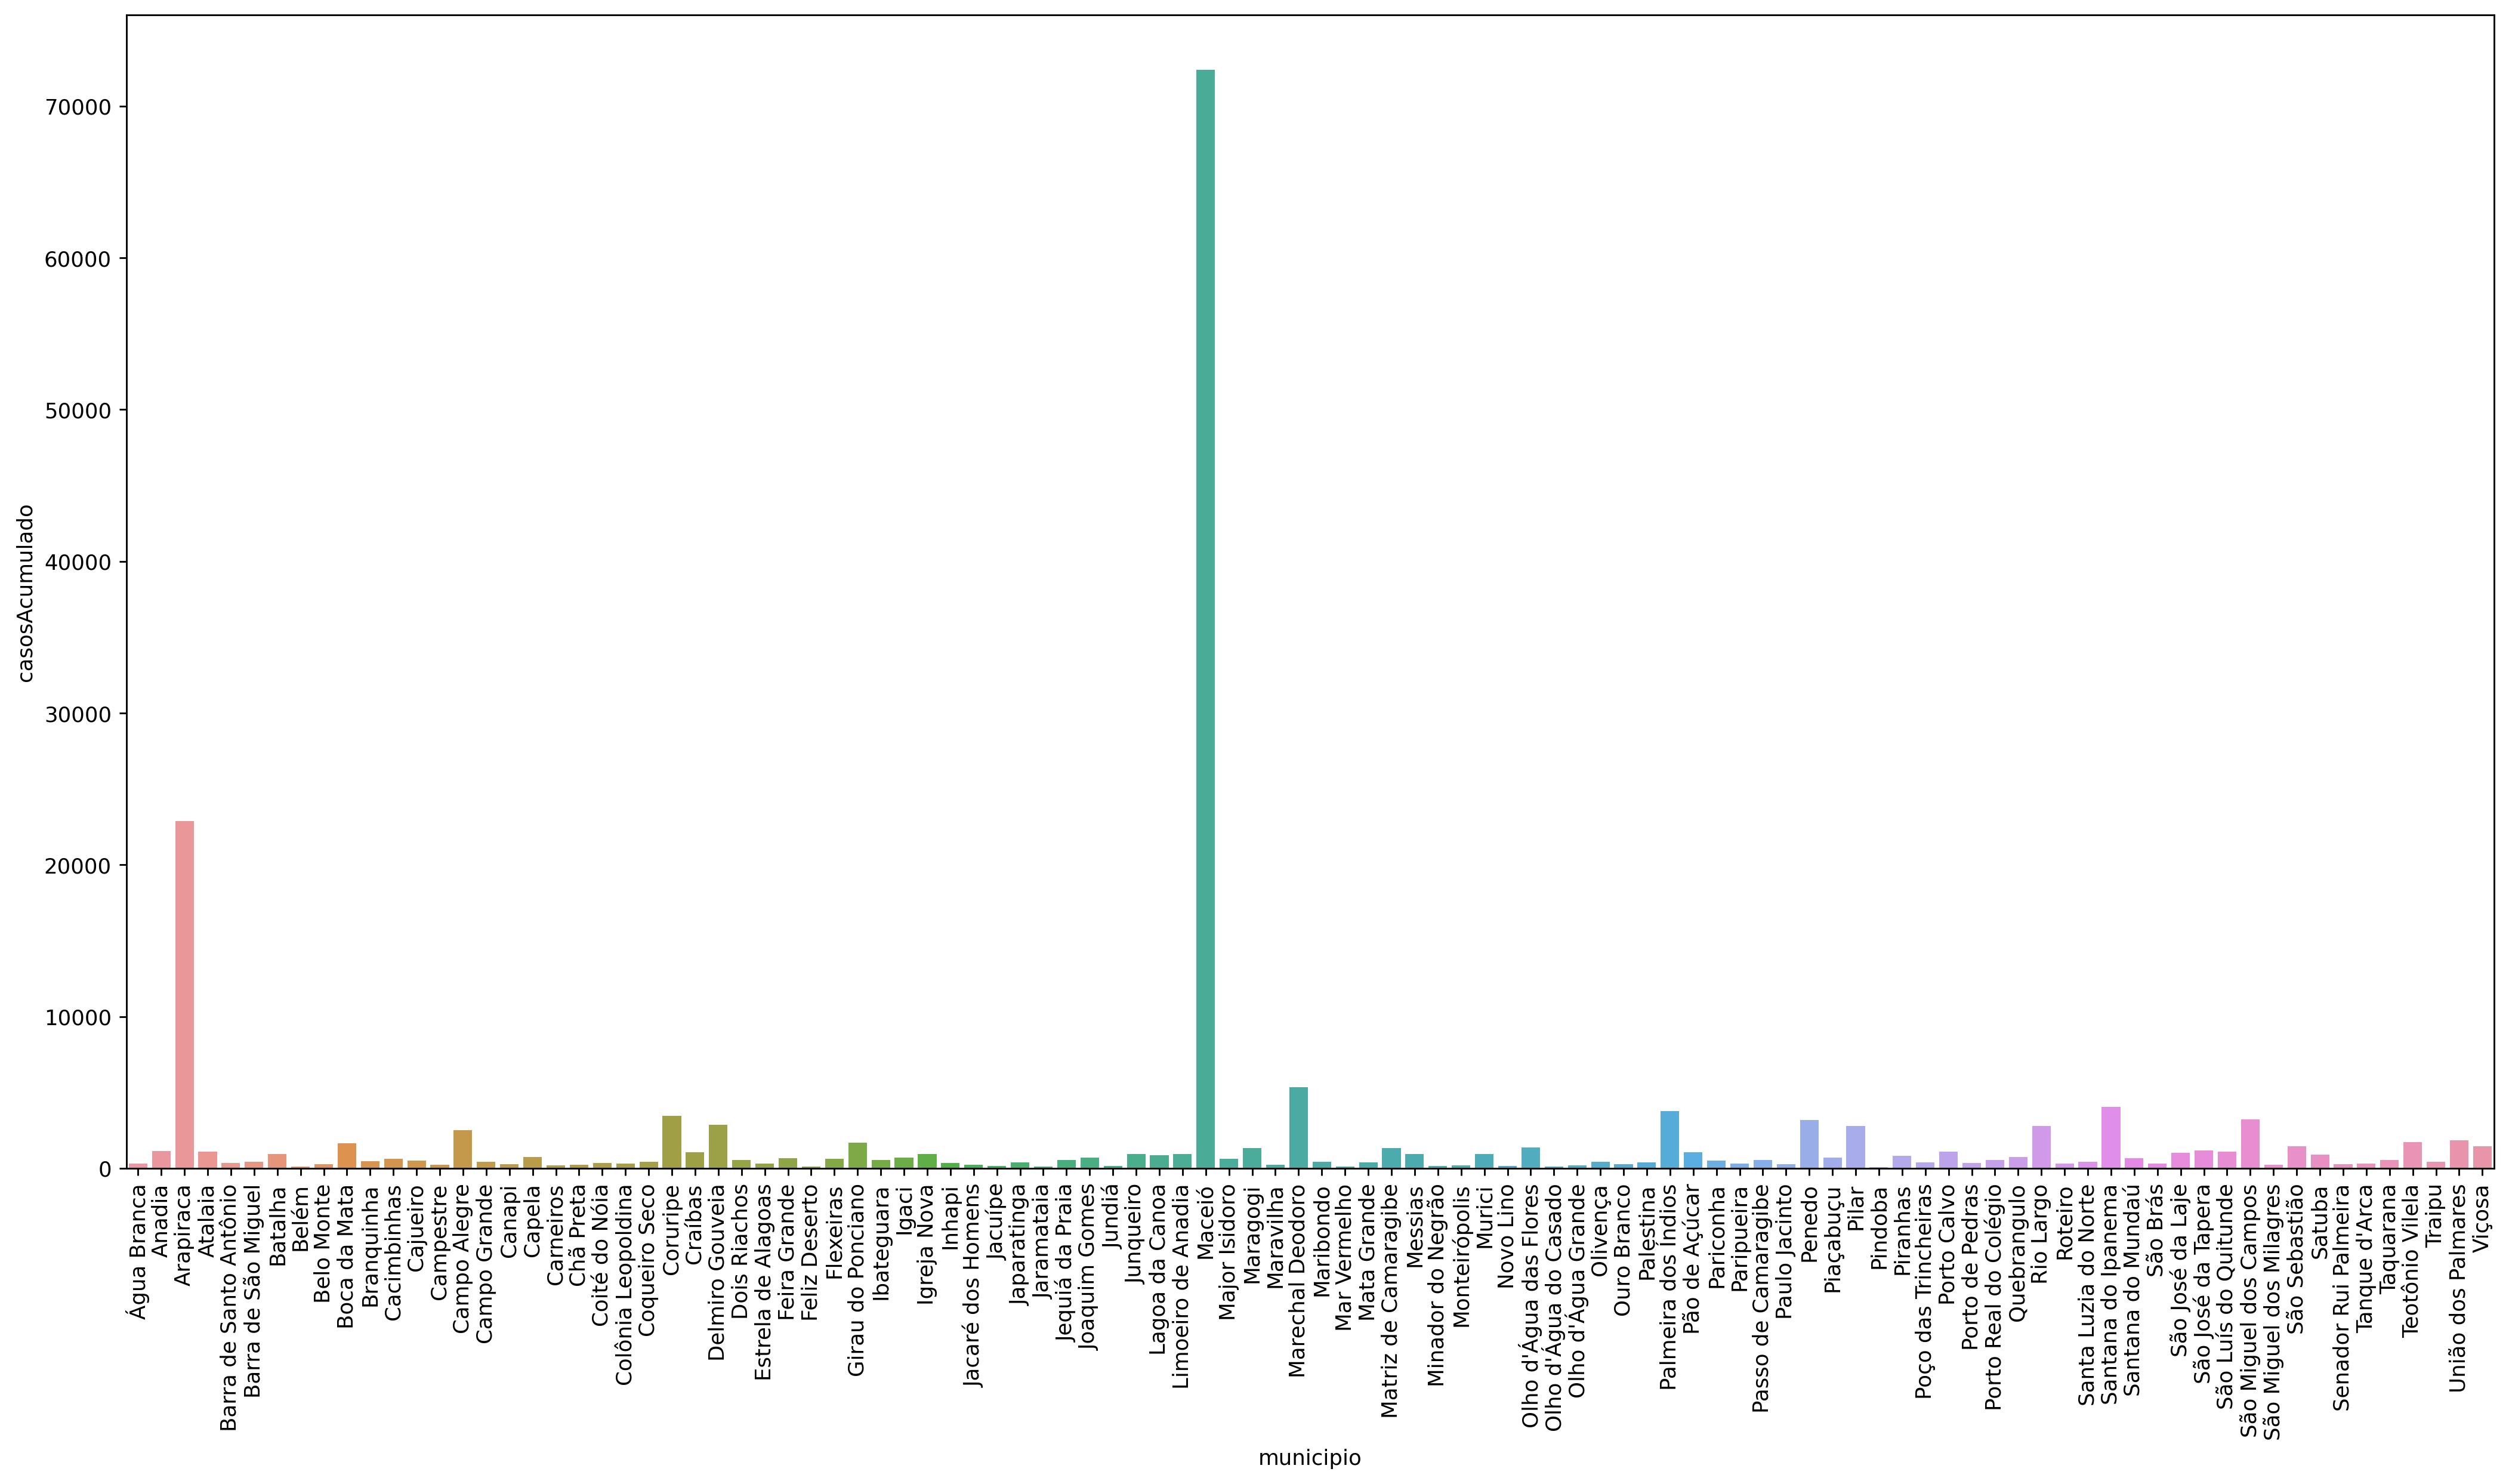

In [20]:
temp = alagoas[alagoas['data'] == "2021-05-15"]

plt.figure(figsize=(20,10), dpi=256)
sns.barplot(x='municipio',y='casosAcumulado',data=temp)
plt.xticks(rotation=90)
plt.show()

In [21]:
# Filtrando por mês ("2020-03-01" - "2021-05-01")
def filtro_mes():
    filtro_data = [
        "2020-03-01",
        "2020-04-01",
        "2020-05-01",
        "2020-06-01",
        "2020-07-01",
        "2020-08-01",
        "2020-09-01",
        "2020-10-01",
        "2020-11-01",
        "2020-12-01",
        "2020-01-01",
        "2021-02-01",
        "2021-03-01",
        "2021-04-01",
        "2021-05-15",
    ]

    alagoas = dataFrame[dataFrame['estado'] == 'AL']

    temp = pd.DataFrame({})

    for data in filtro_data:
        temp = temp.append(alagoas[alagoas['data'] == data])
    
    return temp

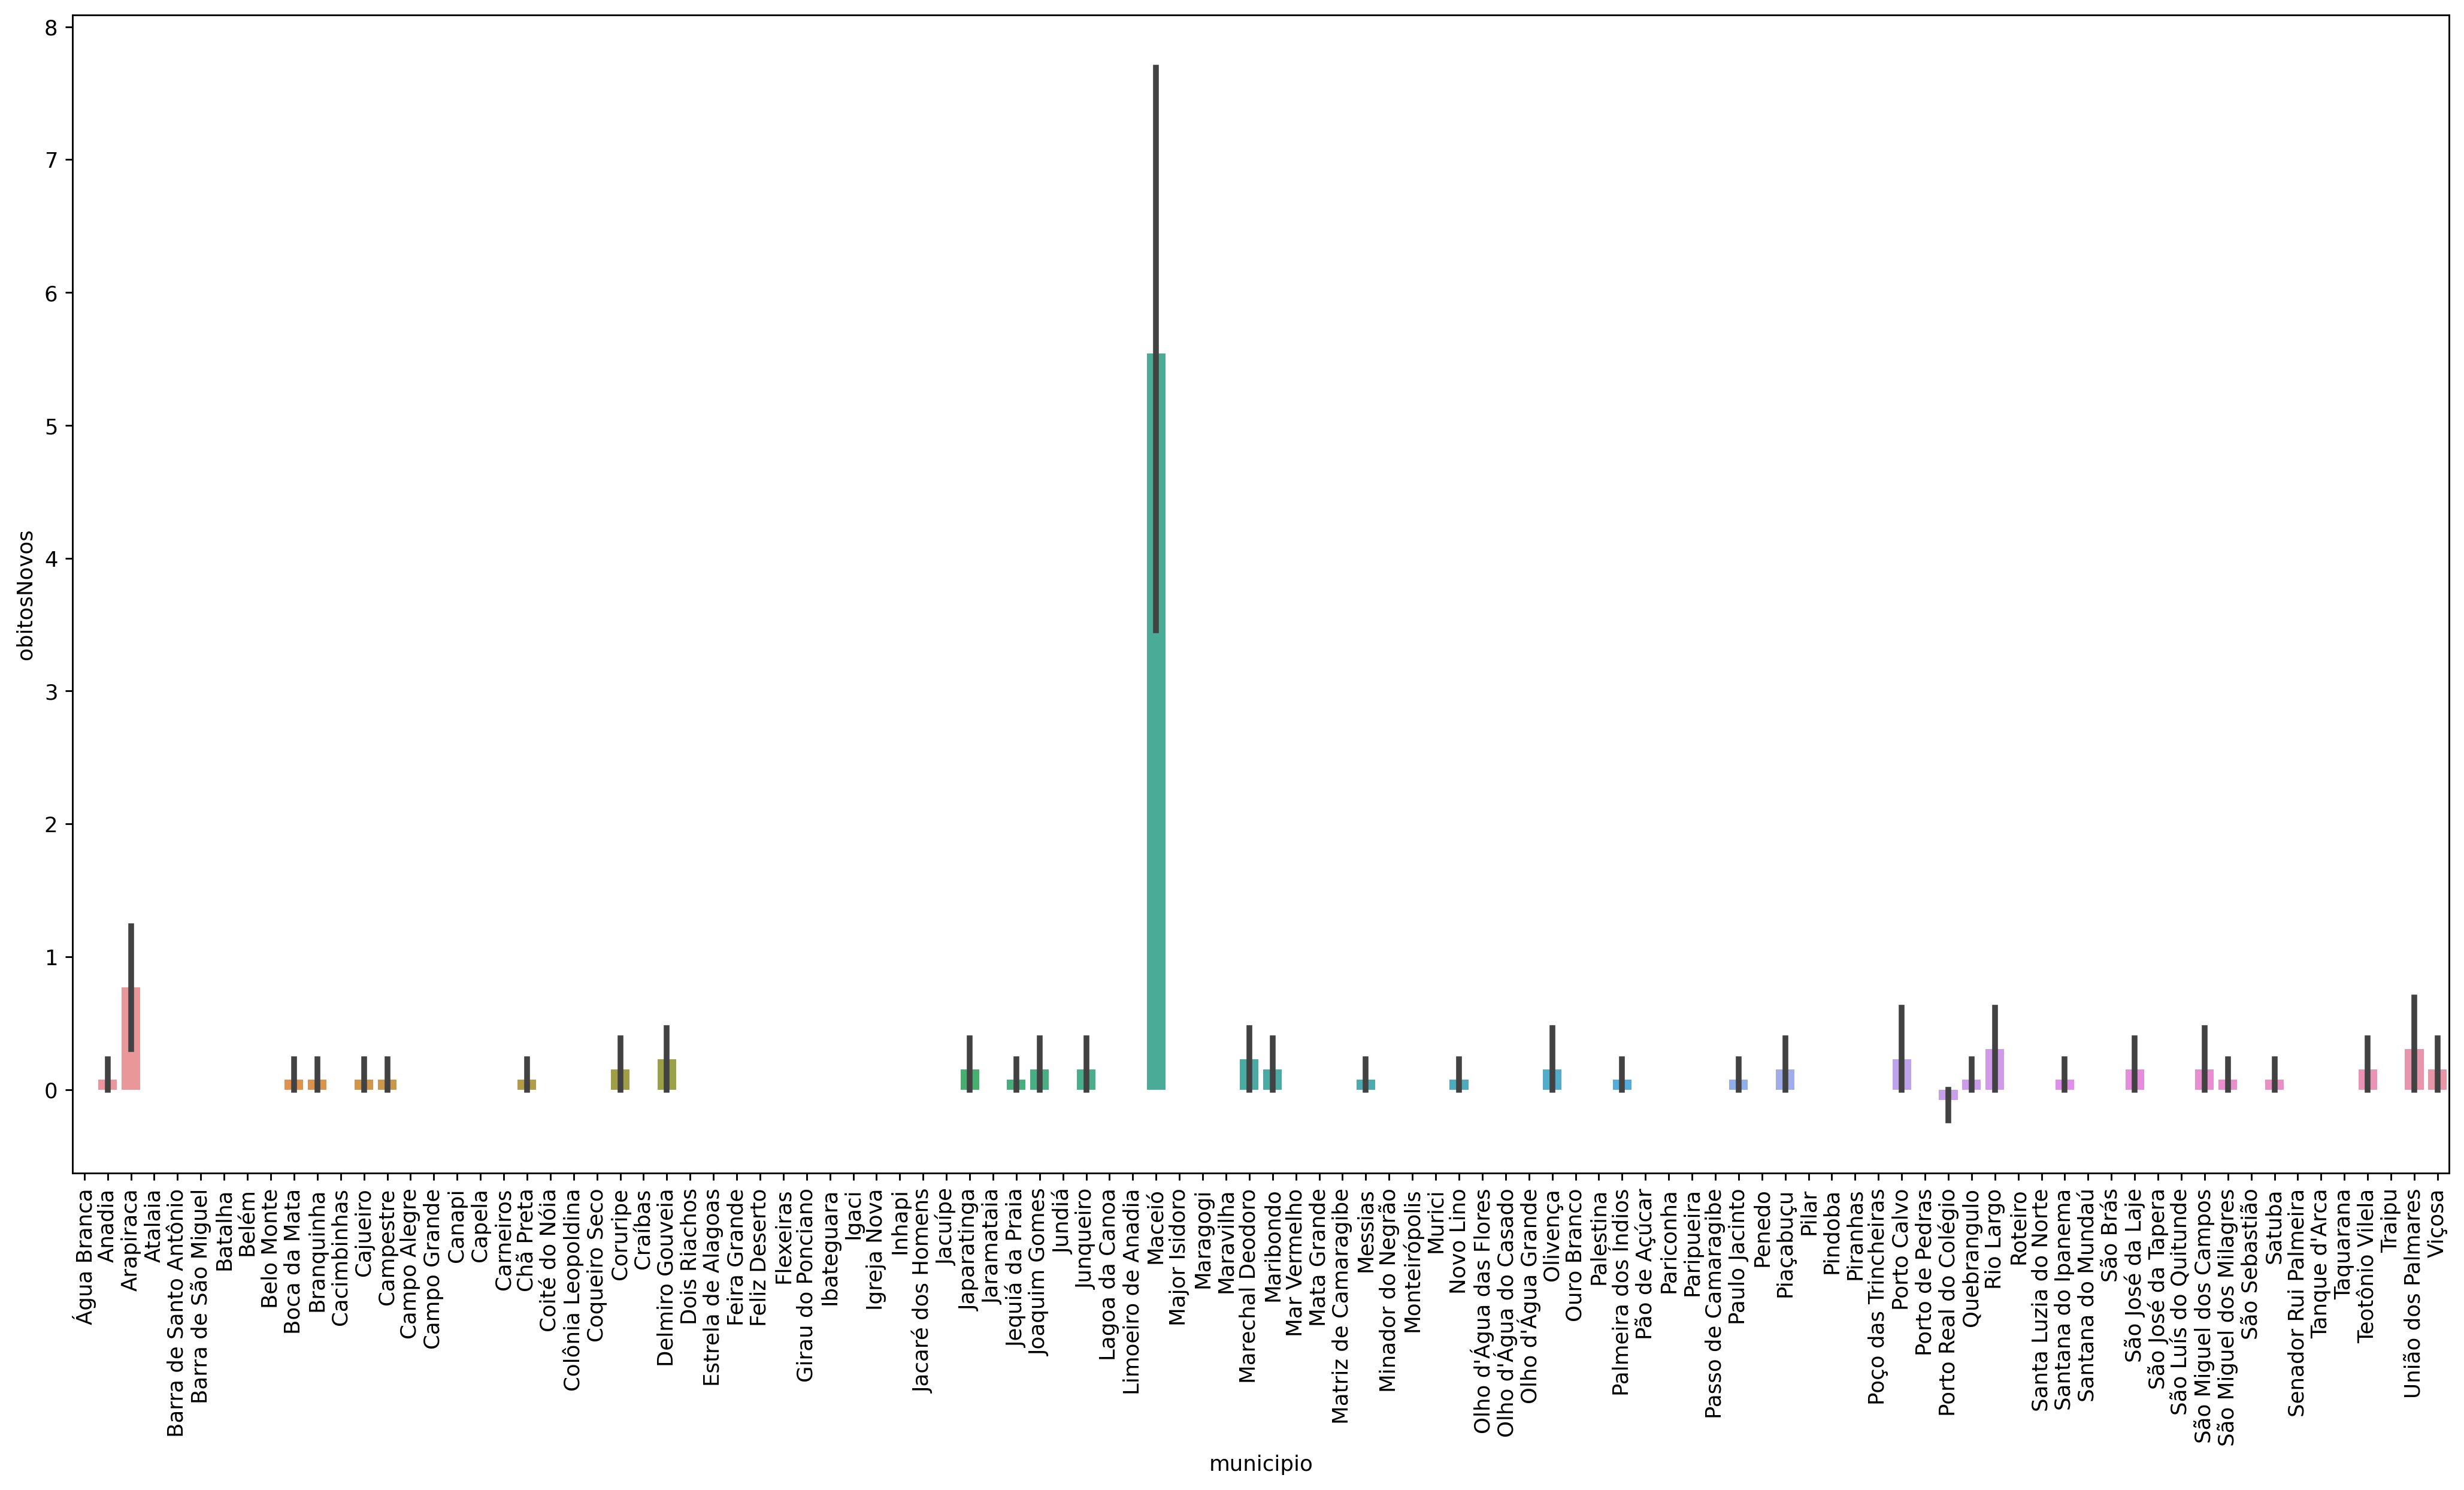

In [22]:
temp = filtro_mes()

plt.figure(figsize=(20,10), dpi=256)
sns.barplot(x='municipio',y='obitosNovos',data=temp)
plt.xticks(rotation=90)
plt.show()

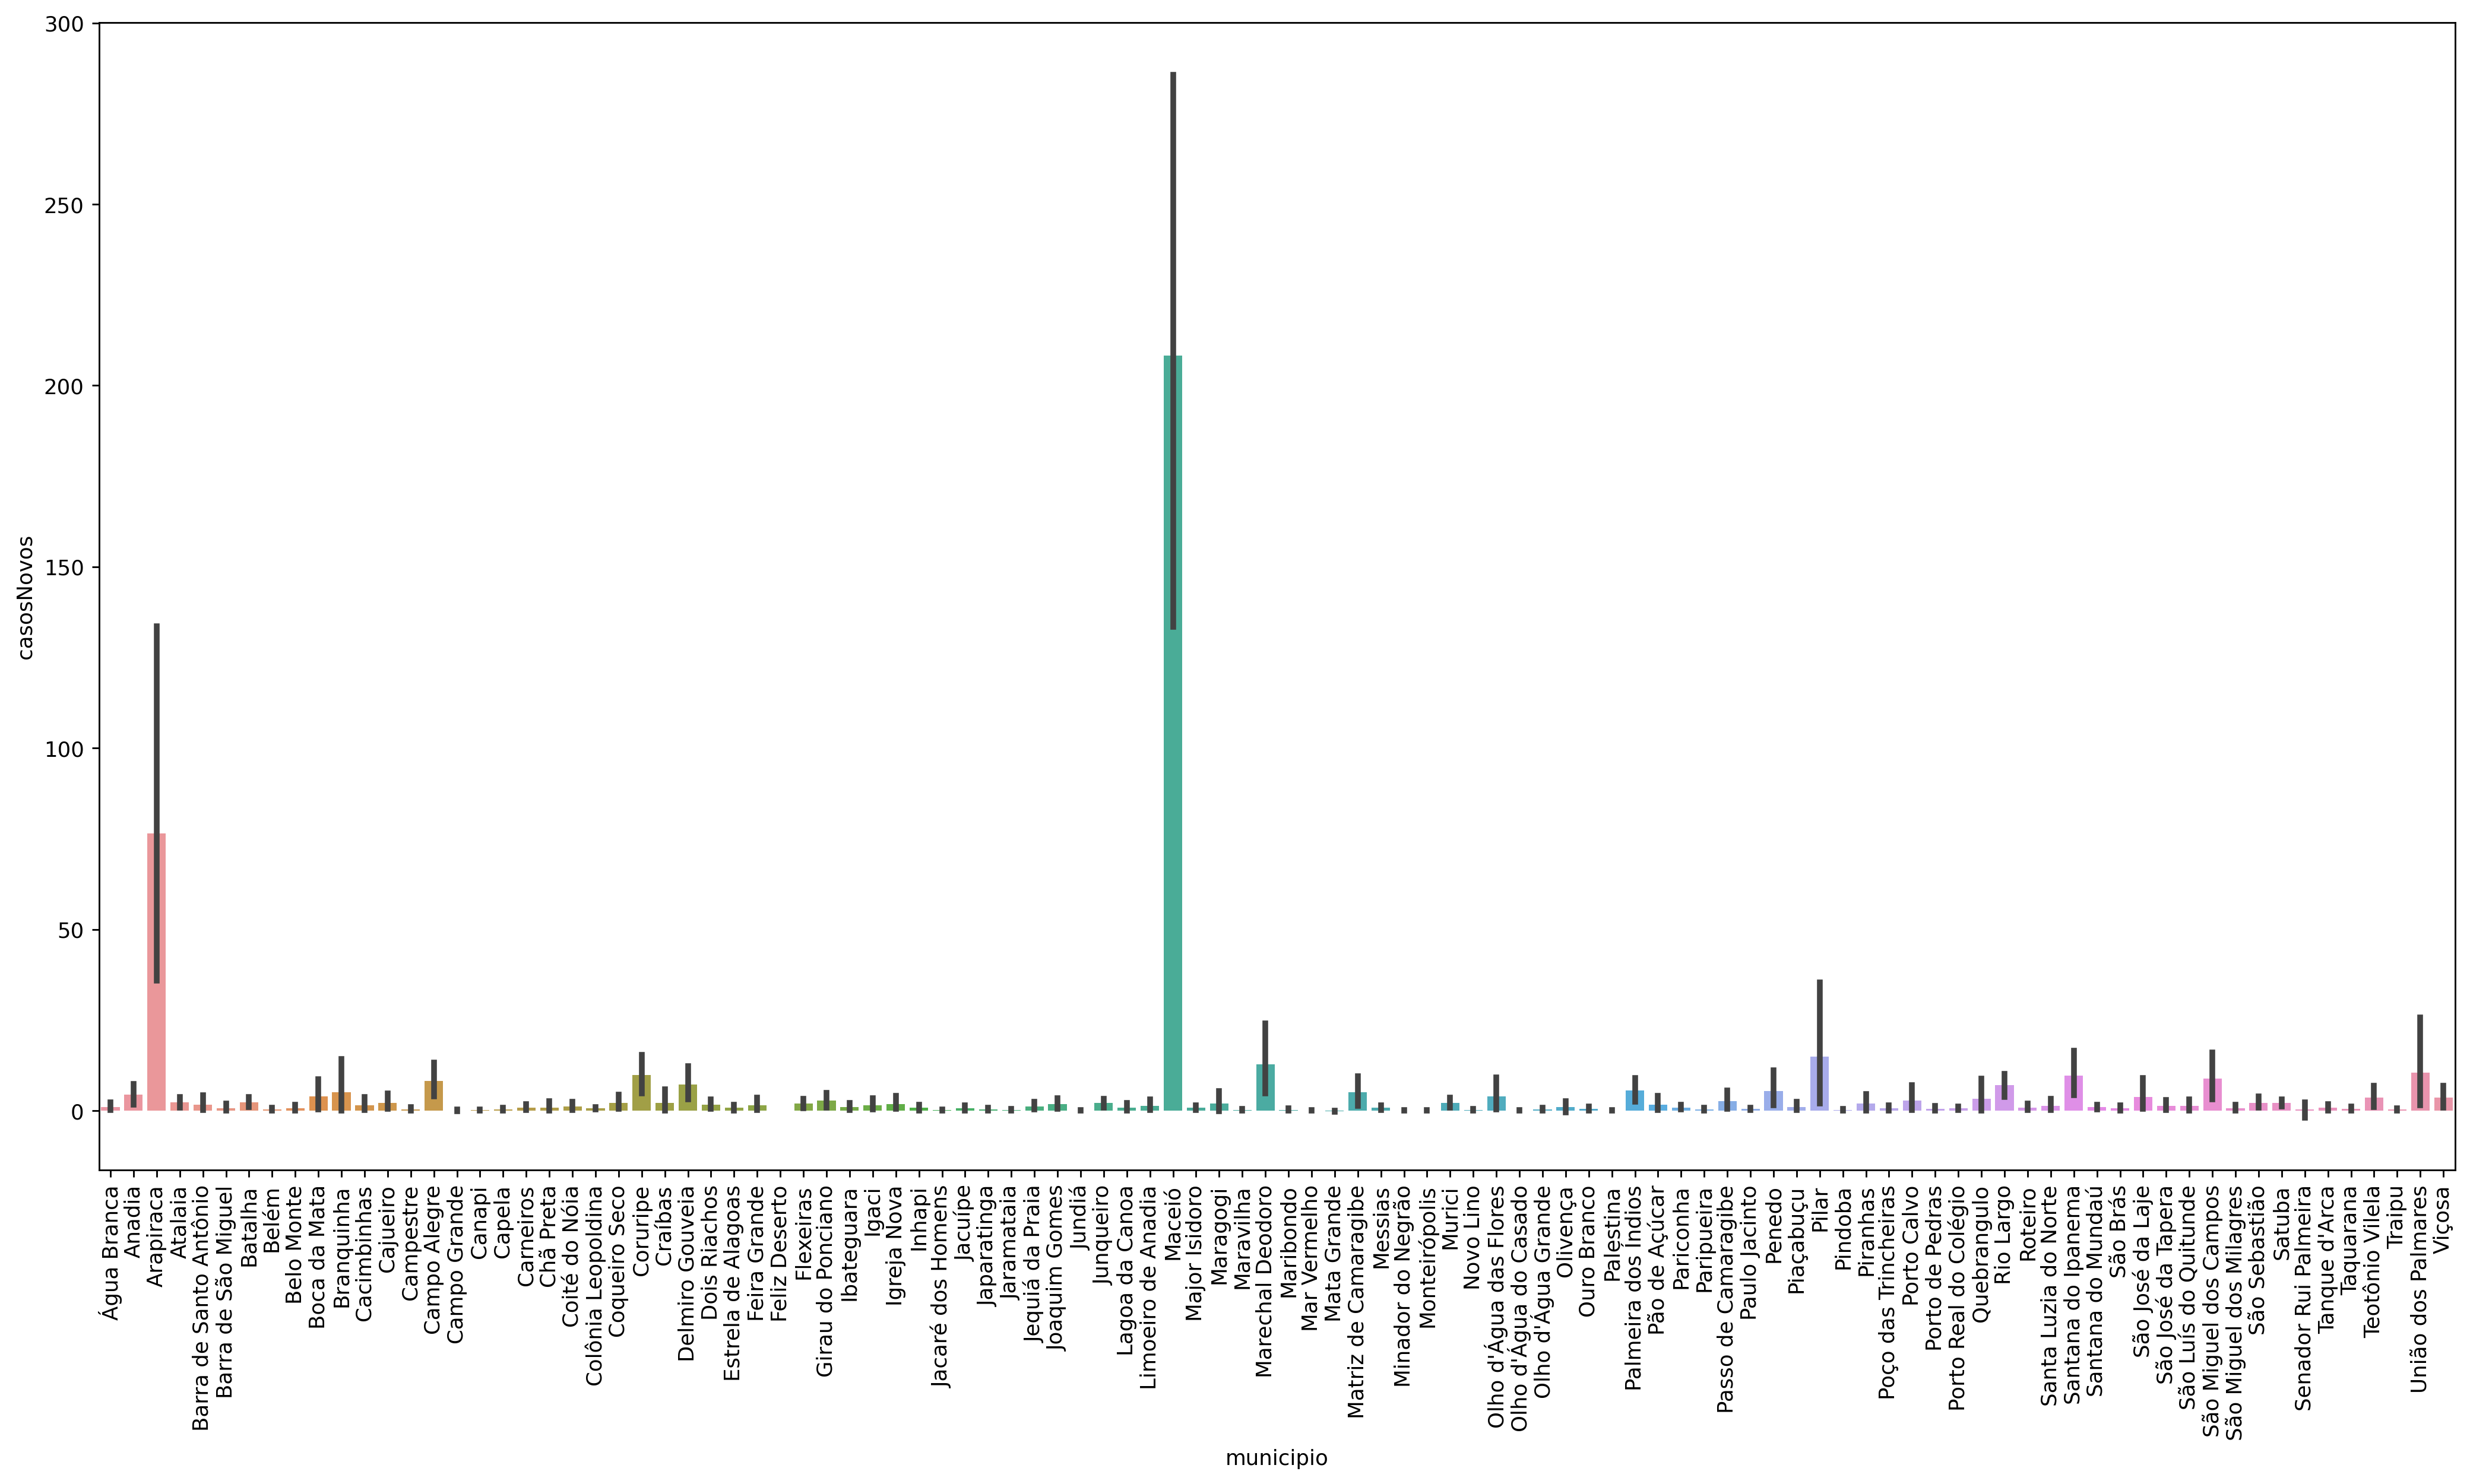

In [23]:
temp = filtro_mes()

plt.figure(figsize=(20,10), dpi=256)
sns.barplot(x='municipio',y='casosNovos',data=temp)
plt.xticks(rotation=90)
plt.show()

## Data Analyzing

In [24]:
dataFrame.reset_index(inplace=True)

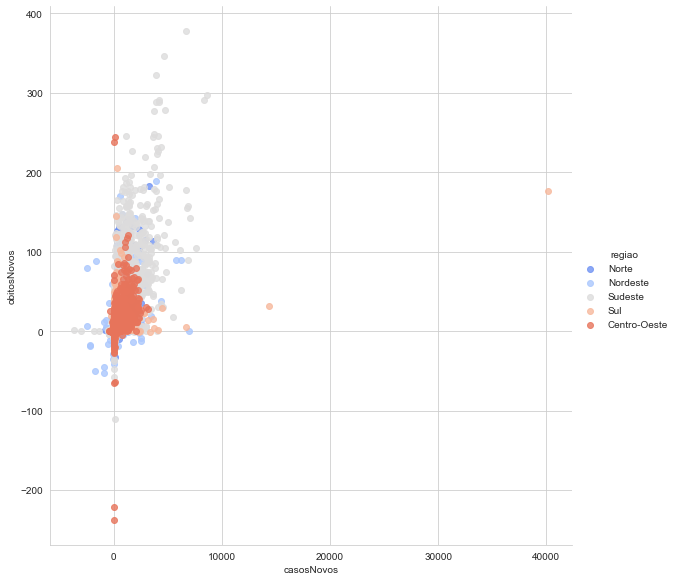

In [25]:
sns.set_style('whitegrid')
sns.lmplot(x='casosNovos', y='obitosNovos', data=dataFrame, hue='regiao', fit_reg=False, height=8, palette='coolwarm')

In [54]:
def data(x):
    if x < 0:
        return 0
    return x

dataFrame['obitosNovos'] = dataFrame['obitosNovos'].apply(data)

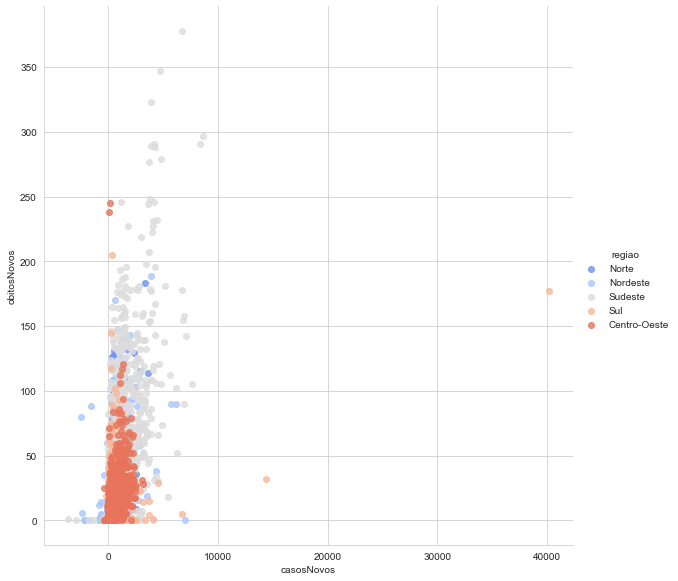

In [57]:
sns.set_style('whitegrid')
sns.lmplot(x='casosNovos', y='obitosNovos', data=dataFrame, hue='regiao', fit_reg=False, height=8, palette='coolwarm')

In [27]:
# sns.set_style('whitegrid')
# sns.lmplot(x='casosAcumulado', y='obitosAcumulado', data=dataFrame, hue='regiao', fit_reg=False, height=8, palette='coolwarm')

In [28]:
# sns.set_style('darkgrid')
# dg = sns.FacetGrid(dataFrame, hue="regiao", height=8, palette='coolwarm', aspect=2)
# dg = dg.map(plt.hist, 'casosNovos', bins=20, alpha=0.5)
# dg.add_legend()

In [29]:
# sns.set_style('darkgrid')
# dg = sns.FacetGrid(dataFrame, hue="regiao", height=8, palette='coolwarm', aspect=2)
# dg = dg.map(plt.hist, 'obitosNovos', bins=20, alpha=0.5)
# dg.add_legend()

# K Means 

In [102]:
from sklearn.cluster import KMeans

In [174]:
x2 = alagoas[['obitosNovos','casosNovos']]
inertia = []

for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n))
    algorithm.fit(x2)
    inertia.append(algorithm.inertia_)

(Text(0.5, 0, 'Número de Clusters'),
 Text(0, 0.5, 'Soma das distâncias Q intra Clusters'))

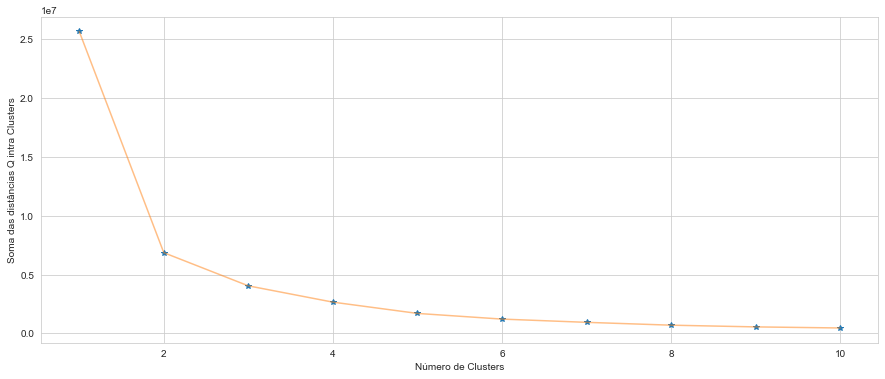

In [175]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, '*')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('Soma das distâncias Q intra Clusters')

In [167]:
kmeans = KMeans(n_clusters=3)

In [168]:
alagoas = dataFrame[dataFrame['estado'] == 'AL']
X = alagoas[['casosNovos','obitosNovos']].values 

In [169]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [170]:
kmeans.cluster_centers_

array([[1.45085616e+02, 3.69863014e+00],
       [2.32911090e+00, 6.08077483e-02],
       [3.67260504e+02, 7.25210084e+00]])

In [171]:
distance = kmeans.fit_transform(X)
distance

array([[2.32990454e+00, 3.67332099e+02, 1.45132753e+02],
       [2.32990454e+00, 3.67332099e+02, 1.45132753e+02],
       [2.32990454e+00, 3.67332099e+02, 1.45132753e+02],
       ...,
       [2.66709584e+01, 3.38338236e+02, 1.16144523e+02],
       [3.34681296e-01, 3.65332491e+02, 1.43133412e+02],
       [1.76709937e+01, 3.47336221e+02, 1.25140286e+02]])

In [172]:
# labels2 = kmeans.labels_
# centroids2 = kmeans.cluster_centers_

# h = 0.02
# x_min = X[:, 0].min() - 1
# x_max = X[:, 0].max() + 1
# y_min, y_max = X[:, 1].max() - 1, X[:, 1].max() + 1
# n_min, n_max = X[:, 2].max() - 1, X[:, 2].max() + 1

# xx, yy, nn = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(n_min, n_max, h))
# z = kmeans.predict(np.c_[xx.ravel(), yy.ravel(), nn.ravel()])

# plt.figure(1, figsize=(15,7))
# plt.clf()
# z2 = z.reshape(xx.shape)
# plt.imshow(z2, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max(), nn.min(), nn.max()), 
#            cmap=plt.cm.Pastel2, aspect='auto')

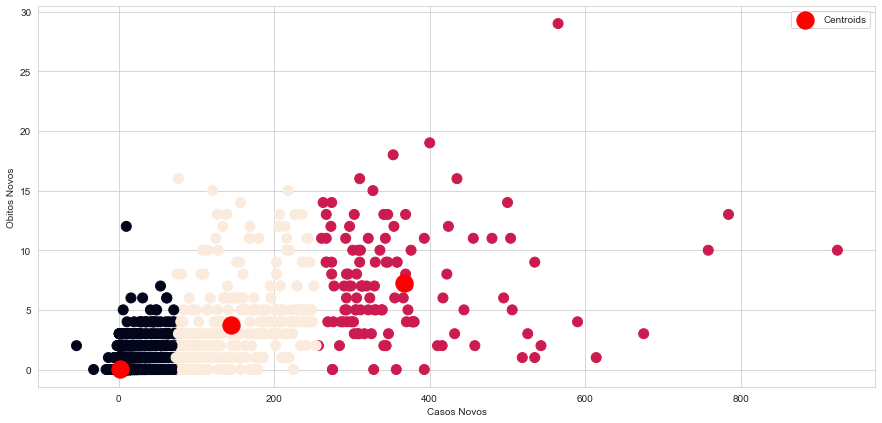

In [173]:
plt.figure(1, figsize=(15,7))
plt.clf()
plt.scatter(X[:,0], X[:,1], s = 100, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c="red", label="Centroids")
plt.xlabel('Casos Novos')
plt.ylabel('Obitos Novos')
plt.legend()

In [164]:
alagoas['clusters'] = kmeans.labels_
df_groupy = alagoas.groupby('clusters')
df_groupy.describe()

<ipython-input-164-f08c7eaf5e49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alagoas['clusters'] = kmeans.labels_


populacaoTCU2019                                                     \
                    count           mean            std       min        25%   
clusters                                                                       
0                  1151.0  176401.076455  287894.672178    5011.0    35111.0   
1                   103.0  957806.174757  211725.776850  231747.0  1018948.0   
2                 40875.0   22396.435229   40928.456383    2908.0     8361.0   
3                   201.0  835110.398010  339233.428160   24399.0  1018948.0   

                                          casosAcumulado                ...  \
                50%        75%        max          count          mean  ...   
clusters                                                                ...   
0           56933.0   231747.0  1018948.0         1151.0   5810.795830  ...   
1         1018948.0  1018948.0  1018948.0          103.0  35826.961165  ...   
2           17053.0    25216.0  1018948.0        40875.0    444.103657  ...   
3         1018948.0  1018948.0  1018948.0          201.0  30338.407960  ...   

         obitosAcumulado         obitosNovos                                \
                     75%     max       count      mean       std  min  25%   
clusters                                                                     
0                   99.0  2023.0      1151.0  0.630756  1.245539  0.0  0.0   
1                 1442.0  2052.0       103.0  7.145631  4.661919  0.0  4.0   
2                   12.0  1015.0     40875.0  0.049713  0.252743  0.0  0.0   
3                 1258.0  2044.0       201.0  4.965174  3.783356  0.0  2.0   

                           
          50%   75%   max  
clusters                   
0         0.0   1.0  16.0  
1         6.0  10.0  29.0  
2         0.0   0.0  12.0  
3         4.0   6.0  15.0  

[4 rows x 40 columns]

In [165]:
df_groupy['obitosNovos'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,1151.0,0.630756,1.245539,0.0,0.0,0.0,1.0,16.0
1,103.0,7.145631,4.661919,0.0,4.0,6.0,10.0,29.0
2,40875.0,0.049713,0.252743,0.0,0.0,0.0,0.0,12.0
3,201.0,4.965174,3.783356,0.0,2.0,4.0,6.0,15.0


In [39]:
# plt.scatter(X[:,0], X[:,1], s = 100, c=kmeans.labels_)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c="red", label="Centroids")